# Ortogonalização e o Double Machine Learning (DML)

Prof. Daniel de Abreu Pereira Uhr

## Conteúdo

* Ortogonalização
  * Aplicação do Procedimento de Ortogonalização no Python
* DML - Orthogonal/Double Machine Learning
  * Partially Linear Regression Models (PLR)
  * Aplicações do DML-Manual para identificar o ATE
  * Aplicações do DML com EconML e DoubleML para identificar o ATE
  * Outros Modelos de DML para identificar o ATE
    * Partially Linear IV Regression Models (PLIV)
    * Interactive regression models (IRM)
    * Interactive IV regression models (IIVM)
* Arcabouço de Resultados Potenciais, Individual Treatment Effects (ITE) e Conditional Average Treatment Effects (CATE)
  * Estimação do CATE com DML
* Estimação do CATE com DML no Python


## Referências

**Principais:**
* Chernozhukov, V., Chetverikov, D., Demirer, M., Duflo, E., Hansen, C., Newey, W., & Robins, J. (2018). Double/debiased machine learning for treatment and structural parameters. The Econometrics Journal, Volume 21, Issue 1, 1 February 2018, Pages C1–C68, https://doi.org/10.1111/ectj.12097
  
* Microsoft EconML: https://econml.azurewebsites.net/
* UBER CausalML: https://causalml.readthedocs.io/en/latest/
* DoubleML for python: https://github.com/DoubleML/doubleml-for-py ou https://docs.doubleml.org/stable/index.html

**Complementares:**
* Chernozhukov, V. and C. Hansen (2004). The effects of 401 (k) participation on the wealth distribution: an instrumental quantile regression analysis. Review of Economics and Statistics 86, 735–51. 
* Chernozhukov, V., D. Chetverikov and K. Kato (2014). Gaussian approximation of suprema of empirical processes. Annals of Statistics 42, 1564–97. 
* Chernozhukov, V., J. Escanciano, H. Ichimura, W. Newey and J. Robins (2016). Locally robust semiparametric estimation. Preprint (arXiv:1608.00033). 
* Chernozhukov, V., C. Hansen and M. Spindler (2015a). Post-selection and post-regularization inference in linear models with very many controls and instruments. Americal Economic Review: Papers and Proceedings 105, 486–90. 
* Chernozhukov, V., C. Hansen and M. Spindler (2015b). Valid post-selection and post-regularization inference: an elementary, general approach. Annual Review of Economics 7, 649–88.
* Bach, P., Chernozhukov, V., Kurz, M. S., and Spindler, M. (2022), DoubleML - An Object-Oriented Implementation of Double Machine Learning in Python, Journal of Machine Learning Research, 23(53): 1-6, https://www.jmlr.org/papers/v23/21-0862.html.
* Bach, P., Chernozhukov, V., Kurz, M. S., Spindler, M. and Klaassen, S. (2024), DoubleML - An Object-Oriented Implementation of Double Machine Learning in R, Journal of Statistical Software, 108(3): 1-56, doi:10.18637/jss.v108.i03, arXiv:2103.09603.
* Chernozhukov, V., Chetverikov, D., Demirer, M., Duflo, E., Hansen, C., Newey, W. and Robins, J. (2018), Double/debiased machine learning for treatment and structural parameters. The Econometrics Journal, 21: C1-C68, doi:10.1111/ectj.12097.
* Lang, M., Binder, M., Richter, J., Schratz, P., Pfisterer, F., Coors, S., Au, Q., Casalicchio, G., Kotthoff, L. and Bischl, B. (2019), mlr3: A modern object-oriented machine learing framework in R. Journal of Open Source Software, doi:10.21105/joss.01903.
* Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M. and Duchesnay, E. (2011), Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12: 2825–2830, https://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html.


**Observações:** O material apresentado aqui é uma adaptação do material de aula do Prof. Daniel de Abreu Pereira Uhr, e não deve ser utilizado para fins comerciais. O material é disponibilizado para fins educacionais e de pesquisa, e não deve ser reproduzido sem a devida autorização do autor. Este material pode conter erros e imprecisões. O autor não se responsabiliza por quaisquer danos ou prejuízos decorrentes do uso deste material. O uso deste material é de responsabilidade exclusiva do usuário. Caso você encontre erros ou imprecisões neste material, por favor, entre em contato com o autor para que possam ser corrigidos. O autor agradece qualquer *feedback* ou sugestão de melhoria.

---

## Ortogonalização

A ideia de ortogonalização é baseada em um teorema elaborado por três econometristas em 1933, Ragnar Frisch, Frederick V. Waugh e Michael C. Lovell. Simplificando, afirma que você pode decompor qualquer modelo de regressão linear multivariável em três estágios ou modelos. 

Digamos que você tem uma matriz de covariáveis $X$, e voce particiona ela em duas partes, $X_{1}$ e $D$. 

* **Primeira Etapa**

Pegamos o primeiro conjunto de variáveis $X_{1}$ e fazemos uma regressão linear de $X_{1}$ em $Y$, onde $\theta_{1}$ é o vetor de parâmetros

$$ y_{i} = \theta_{0} + \theta_{1} X_{1i} + \epsilon_{i}$$

e guardamos os resíduos dessa regressão ($y^{*}$).

$$ y^{*}_{i} = y_{i} - \hat{y}_{i} = y_{i} - ( \hat{\theta}_{0} + \hat{\theta}_{1} X_{1i} )$$

* **Segunda Etapa**

Pegamos novamente o primeiro conjunto de características, mas agora executamos um modelo onde estimamos o segundo conjunto de características ($D$)

$$ D_{i} = \gamma_{0} + \gamma_{1} X_{1i} + e_{i}$$

Aqui, estamos usando o primeiro conjunto de recursos para prever o segundo conjunto de recursos. Por fim, consideramos também os resíduos desta segunda etapa.

$$ D_{i}^{*} = D_{i} - (\hat{\gamma_{0}} + \hat{\gamma_{1}} X_{1i})$$

* **Terceira etapa**

Por fim, pegamos os resíduos do primeiro e do segundo estágio e estimamos o seguinte modelo

$$ y_{i}^{*} = \alpha_{0} + \beta_{2} D_{i}^{*} + e_{i}$$


* **Teorema Frisch – Waugh – Lovell (FWL)**

O teorema FWL afirma que a estimativa do parâmetro $\hat{\beta}_{2}$ (ATE), estimado anteriormente, é equivalente ao que obtemos ao executar a regressão completa, com todas as covariáveis.

$$ y_{i} = \beta_{0} + \beta_{1} X_{1i} + \beta_{2} D_{i} + e_{i}$$


**Intuição do teorema FWL**

Sabemos que a regressão é um modelo muito especial. Cada um de seus parâmetros tem a interpretação de uma derivada parcial, quanto seria Y se X aumentasse em uma unidade, mantendo todos as outras covariáveis constantes. Sabemos também que se omitirmos variáveis ​​da regressão, teremos viés. Especificamente, viés variável omitido (ou viés de confusão). Ainda assim, Frisch-Waugh-Lovell está dizendo que posso dividir meu modelo de regressão em duas partes, nenhuma delas contendo o conjunto completo de recursos, e ainda assim obter a mesma estimativa que obteria executando a regressão inteira. 

O teorema fornece algumas dicas sobre o que a regressão linear está fazendo. Para obter o coeficiente de uma variável $X_{k}$, a regressão primeiro usa todas as outras variáveis ​​para prever $X_{k}$ e pega os resíduos. Isso “limpa” $X_{k}$ de qualquer influência dessas variáveis. Dessa forma, quando tentamos entender o impacto de $X_{k}$ sobre $Y$, estará livre de viés de variável omitida. Em segundo lugar, a regressão usa todas as outras variáveis ​​para prever $Y$ e pega os resíduos. Isso “limpa” $Y$ de qualquer influência dessas variáveis, reduzindo a variância de $Y$ para que seja mais fácil ver como $X_{k}$ afeta $Y$.

A regressão linear está estimando o impacto de $D$ sobre $y$ enquanto contabiliza $X_{1}$. Isso é importante para inferência causal. 

Assim, podemos construir um modelo que preveja um tratamento ($D$) usando as covariáveis $X$, um modelo que prevê o resultado $y$ usando as mesmas covariáveis, pegar os resíduos de ambos os modelos e executar um modelo que estime como o resíduo de $D$ afetam os resíduos de $y$. Este último modelo vai me dizer como $D$ afeta $y$ enquanto controla por $X$. 

Ou seja, **os dois primeiros modelos controlam as variáveis de confusão**. Eles estão **gerando dados que são praticamente aleatórios**. Lembre que é isso que estaria distorcendo seus dados. Então, usamos no modelo final para estimar o efeito causal de interesse **Average Treatment Effect - ATE**.

### Aplicação do Procedimento de Ortogonalização no Python

Vamos aplicar o procedimento de ortogonalização considerando um modelo de regressão linear simples. Vamos realizar a orgonalização supondo linearidade entre as variáveis para entender o conceito. Posteriormente, vamos aplicar o procedimento de ortogonalização em um modelo de machine learning. 

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

In [2]:
# DataFrame
df = pd.read_stata("https://github.com/Daniel-Uhr/data/raw/main/cattaneo2.dta")

# Criar a variável de resultado
df['Y'] = df['bweight']

# Criar a variável 'Treated' com valor 1 se 'mbsmoke' for 'smoker', caso contrário 0
df['D'] = np.where(df['mbsmoke'] == 'smoker', 1, 0)

# Criar a variável 'casada' com valor 1 se 'mmarried' for 'married', caso contrário 0
df['casada'] = np.where(df['mmarried'] == 'married', 1, 0)


Para desviar este conjunto de dados, precisaremos de dois modelos. O primeiro modelo, vamos chamá-lo $M_{D}(X)$, prevê o tratamento (Se a gestante é fumante, no nosso caso) utilizando os confundidores. É um dos estágios que vimos acima, no teorema de Frisch–Waugh–Lovell.

Assim que tivermos este modelo, construiremos os resíduos

$$ D_{i}^{*} = D_{i} - M_{D}(X_{i})$$

In [3]:
m_D = smf.ols("D ~ 1 + casada + mage + medu + fhisp + mhisp + foreign + alcohol + deadkids + nprenatal + mrace + frace + fage + fedu", data=df).fit()
df['D_star'] = df['D'] - m_D.predict(df)

Você pode pensar neste resíduo como uma versão do tratamento que é imparcial ou, melhor ainda, que é impossível de prever a partir dos fatores de confusão $X$. Como os fatores de confusão já eram usados ​​para prever $D$, o resíduo é, por definição, imprevisível com com $X$. Outra maneira de dizer isso é que o viés foi explicado pelo modelo $M_{D}(X)$, produzindo $D_{i}^{*}$ que é tão bom quanto atribuído aleatoriamente. É claro que isso só funciona se tivermos em $X$ todos os fatores de confusão que causam ambos $D$ e $Y$.

Também podemos construir resíduos para o resultado.

$$ y_{i}^{*} = y_{i} - M_{y}(X_{i})$$


Este é outro estágio do teorema de Frisch – Waugh – Lovell. Isso não torna o conjunto menos tendencioso, mas facilita a estimativa do efeito, reduzindo a variância em $y$. Mais uma vez você pode pensar $y_{i}^{*}$ como uma versão de $y_{i}$ imprevisível de $X$ ou que teve todas as suas variações devido a $X$ explicadas. Pense nisso. Nós já usamos $X$ para prever $y$ com $M_{y}(X_{i})$. E $y_{i}^{*}$ é o erro dessa previsão. Então, por definição, não é possível prever isso a partir de $X$. Todas as informações em $X$ para prever $y$ já foram usadas. Se for esse o caso, a única coisa que resta para explicar $y_{i}^{*}$ é algo que não usamos usamos para construí-lo (não incluído em $X$), que é apenas o tratamento (novamente, assumindo que não há fatores de confusão não medidos).


In [4]:
m_y = smf.ols("Y ~  1 + casada + mage + medu + fhisp + mhisp + foreign + alcohol + deadkids + nprenatal + mrace + frace + fage + fedu", data=df).fit()
df['y_star'] = df['Y'] - m_y.predict(df)

Por fim, aplicando o teorema para o segundo estágio,

$$ y_{i}^{*} = \alpha_{0} + \beta_{2} D_{i}^{*} + e_{i}$$


In [5]:
FWL1 = smf.ols("y_star ~ D_star", data=df).fit()
print(FWL1.summary())

                            OLS Regression Results                            
Dep. Variable:                 y_star   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     100.6
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           1.91e-23
Time:                        08:44:25   Log-Likelihood:                -35858.
No. Observations:                4642   AIC:                         7.172e+04
Df Residuals:                    4640   BIC:                         7.173e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.586e-11      8.041   1.97e-12      1.0

Podemos comparar o resultado com o OLS tradicional que considera diretamente todas as covariáveis:

In [6]:
ols = smf.ols("Y ~ D + 1 + casada + mage + medu + fhisp + mhisp + foreign + alcohol + deadkids + nprenatal + mrace + frace + fage + fedu", data=df).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     38.49
Date:                Thu, 27 Mar 2025   Prob (F-statistic):          5.80e-100
Time:                        08:44:28   Log-Likelihood:                -35858.
No. Observations:                4642   AIC:                         7.175e+04
Df Residuals:                    4627   BIC:                         7.184e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2851.5203     54.983     51.861      0.0

Realmente o teorema de Frisch-Waugh-Lovell funciona mesmo.

Podemos concluir que depois de fazermos as duas transformações, a única coisa que resta para prever esses resíduos é o tratamento. 

Para resumir, ao prever o tratamento, construímos $D^{*}$ que funciona como uma versão imparcial do tratamento; ao prever o resultado, construímos $y^{*}$ que é uma versão do resultado que só pode ser explicada se usarmos o tratamento. Esses dados, onde substituímos por $y$ por $y^{*}$ e $D$ por $D^{*}$, são os dados desviados que queríamos. Podemos usá-lo para avaliar nosso modelo causal da mesma forma que fizemos anteriormente, usando dados aleatórios.

##  DML - Orthogonal/Double Machine Learning

* Double Machine Learning - DML
* Double/Debiased Machine Learning - DDML 

No exemplo anterior vimos que o teorema de Frisch-Waugh-Lovell nos permite estimar o efeito causal de um tratamento $D$ sobre um resultado $Y$ enquanto controlamos por um conjunto de covariáveis $X$ para uma abordagem linear nos dois estágios.

No entanto, a abordagem linear pode ser muito restritiva. Em muitos casos, as relações entre as variáveis podem ser não lineares ou de alta dimensão. Nesses casos, podemos usar **algoritmos de aprendizado de máquina** para **descobrir essas relações não lineares de alta dimensão**. Nesse sentido, o artigo de **Chernozhukov et al (2018)**  mostra que também é possível fazer ortogonalização com modelos de aprendizado de máquina. Vejamos a ideia básica - Chamado de modelo "Partially Linear Regression Models (PLR)".

### Partially Linear Regression Models (PLR)

O modelo PLR é usado para problemas de inferência causal com um tratamento $D$ e um resultado $Y$, assumindo que a relação entre $D$ e $Y$ é linear, enquanto outras covariáveis $X$ podem ter relações não lineares com $Y$ ou $D$.

$$ Y_{i} = \theta D_{i} + M(X_{i}) + \epsilon_{i}$$

Então, o modelo PLR é uma extensão do modelo de regressão linear tradicional, onde a relação entre $D$ e $Y$ é linear, mas a relação entre $X$ e $Y$ ou $D$ pode ser não linear. Seguindo o procedimento do FWL, obtemos os resíduos:

$$ y_{i}^{*} = y_{i} - M_{y}(X_{i})$$

$$ D_{i}^{*} = D_{i} - M_{D}(X_{i})$$

onde $M_{y}$ e $M_{D}$ são modelos não lineares que podem ser obtidos por algorítmos de aprendizado de máquina. A ideia é que o conjunto de recursos ($X$) prevê o resultado ($Y$) e o tratamento ($D$) e, por alguma função não linear.

* **Conceitos importantes relacionados**
  * ***Machine Learning (ML)* e *Overfitting*** : Os modelos de aprendizado de máquina (ML) podem ajustar-se perfeitamente aos dados, ou melhor, superajustá-los (*Overfitting* / "sobreajuste"). 

Apenas olhando para as equações anteriores, podemos saber o que acontecerá nesse caso.
  * Se $M_{y}$ de alguma forma superajusta, os resíduos serão todos muito próximos de zero. Se isso acontecer, será difícil descobrir como $D$ afeta isso. 
  * Se $M_{D}$ de alguma forma superajusta, seus resíduos também serão próximos de zero. 
  * Conseqüentemente, não haverá variação no resíduo do tratamento ($D$) para ver como isso pode impactar o resultado ($Y$).

O que fazer em caso de *Overfitting*?

* **Regularização**: técnica que adiciona um termo à função de perda que penaliza os coeficientes do modelo. Isso faz com que o modelo seja menos sensível aos dados de treinamento, evitando o superajuste.

Quais os modelos de ML mais comuns para previsão?

* Random Forest: é um modelo de aprendizado de máquina que pode ser usado tanto para classificação quanto para regressão. Ele é um modelo de conjunto que treina várias árvores de decisão em subconjuntos aleatórios dos dados e faz a média de suas previsões.
* Gradient Boosting: é um modelo de aprendizado de máquina que constrói um modelo aditivo de forma progressiva. Ele permite a otimização de funções de perda diferenciáveis arbitrárias.
* Redes Neurais: são modelos de aprendizado de máquina que são inspirados na forma como o cérebro humano funciona. Eles são compostos por camadas de neurônios que processam e transmitem informações.
* Support Vector Machines: são modelos de aprendizado de máquina que são usados para classificação e regressão. Eles são eficazes em espaços de alta dimensão e são capazes de lidar com dados não lineares.
* Outros modelos de ML mais usados em economia são: LASSO, Ridge, Elastic Net, etc. LASSO é um método de regressão que adiciona uma penalidade L1 à função de perda. Isso faz com que alguns coeficientes sejam exatamente zero, o que é útil para seleção de recursos. Ridge é um método de regressão que adiciona uma penalidade L2 à função de perda. Isso faz com que os coeficientes sejam menores, o que é útil para reduzir a variância. Elastic Net é um método de regressão que combina as penalidades L1 e L2. Isso permite que você selecione recursos e reduza a variância ao mesmo tempo.

**Validação Cruzada (Cross-Validation)**:  é uma técnica estatística usada para avaliar a performance de um modelo preditivo e sua capacidade de generalização para novos dados. Em essência, é um método de dividir os dados disponíveis em partes para treinar e testar o modelo de maneira eficiente e confiável.

* **Validação Cruzada K-fold**: é uma técnica de validação cruzada que divide os dados em k partes. O modelo é treinado em k-1 partes e testado na parte restante. Isso é feito k vezes, de modo que cada parte seja usada como conjunto de teste exatamente uma vez.

<div style="text-align:center;">
    <img src="images\kfold-cv.png"  alt="Imagem" style="width: 450px;"/>
</div>

Felizmente, esse tipo de validação cruzada é muito fácil de implementar usando `cross_val_predict` função do Sklearn.


### Aplicações do DML-Manual para identificar o ATE

Visto esses conceitos básicos, vamos voltar ao DML. Especialmente, vamos aplicar o DML considerando dois modelos de machine learning. Primeiramente consideramos o Random Forest e posteriormente o Gradient Boosting.

1. Aplicação do DML com o Random Forest

In [7]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

X = ['casada', 'mage', 'medu', 'fhisp', 'mhisp', 'foreign', 'alcohol', 'deadkids', 'nprenatal', 'mrace', 'frace', 'fage', 'fedu']
D = "D"
y = "Y"

folds = 10
np.random.seed(123)

m_D1 = RandomForestClassifier(n_estimators=100, random_state=123)
D_res1 = df[D] - cross_val_predict(m_D1, df[X], df[D], cv=folds)

m_y1 = RandomForestRegressor(n_estimators=100, random_state=123)
y_res1 = df[y] - cross_val_predict(m_y1, df[X], df[y], cv=folds)

In [8]:
FWL_DML1 = smf.ols("y_res1 ~ D_res1", data=df).fit()
print(FWL_DML1.summary())

                            OLS Regression Results                            
Dep. Variable:                 y_res1   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     67.90
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           2.22e-16
Time:                        08:45:01   Log-Likelihood:                -36188.
No. Observations:                4642   AIC:                         7.238e+04
Df Residuals:                    4640   BIC:                         7.239e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.8144      8.862      2.574      0.0

2. Aplicação do DML com o Gradient Boosting Machines (GBM)

In [9]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
import numpy as np

# Definir as variáveis X, D, y
X = ['casada', 'mage', 'medu', 'fhisp', 'mhisp', 'foreign', 'alcohol', 'deadkids', 'nprenatal', 'mrace', 'frace', 'fage', 'fedu']
D = "D"
y = "Y"

# Definir o número de folds para a validação cruzada
folds = 10
np.random.seed(123)

# Garantir reprodutibilidade nos modelos de Gradient Boosting
m_D2 = GradientBoostingClassifier(n_estimators=100, random_state=123)
D_res2 = df[D] - cross_val_predict(m_D2, df[X], df[D], cv=folds)

m_y2 = GradientBoostingRegressor(n_estimators=100, random_state=123)
y_res2 = df[y] - cross_val_predict(m_y2, df[X], df[y], cv=folds)

O segundo estágio do DML é estimar o efeito do tratamento no resultado. Para isso, usamos um modelo de regressão linear.

In [10]:
FWL_DML2 = smf.ols("y_res2 ~ D_res2", data=df).fit()
print(FWL_DML2.summary())

                            OLS Regression Results                            
Dep. Variable:                 y_res2   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     77.25
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           2.08e-18
Time:                        08:45:13   Log-Likelihood:                -35887.
No. Observations:                4642   AIC:                         7.178e+04
Df Residuals:                    4640   BIC:                         7.179e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.4239      8.533      2.862      0.0

Vimos a mecânica do DML. Com o uso de modelos de ML não lineares.

Na aula extra (13-xtr_ML_overf_CV.ipynb), você pode verificar como escolher o melhor modelo de ML (procedimentos de validação cruzada, e critérios de seleção de modelos).



### Aplicações do DML através de pacotes para identificar o ATE

**EconML**

Vamos utilizar o pacote EconML para aplicar o DML de forma mais eficiente. Esse pacote aplica Validação Cruzada Adaptativa.

In [11]:
import pandas as pd
from econml.dml import LinearDML
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

# Definir as variáveis
X = df[['casada', 'mage', 'medu', 'fhisp', 'mhisp', 'foreign', 'alcohol', 'deadkids', 'nprenatal', 'mrace', 'frace', 'fage', 'fedu']]
D = df['D']
y = df['Y']

# Converter variáveis categóricas em dummies (se necessário)
X = pd.get_dummies(X, drop_first=True)

# Definir os modelos de Machine Learning para (i) X em Y, e (ii) X em D
model_y = GradientBoostingRegressor(n_estimators=100, random_state=123)
model_d = GradientBoostingClassifier(n_estimators=100, random_state=123)

# Criar o estimador LinearDML
estimator = LinearDML(model_y=model_y,
                      model_t=model_d,
                      discrete_treatment=True,
                      cv=10,
                      random_state=123)

# Ajustar o modelo
estimator.fit(y, D, X=X)

ate_inf = estimator.ate_inference(X=X)
print(ate_inf.summary())

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
  -210.026      26.169 -8.026    0.0      -261.315      -158.736
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
  120.872        -397.661         131.258
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
     123.672       -450.408        161.909
------------------------------------------


Os resultados não são identicos porque No método manual com cross_val_predict, estamos usando validação cruzada *k-fold* para calcular os resíduos. O cross_val_predict faz predições out-of-sample para cada observação, mas: 
* Ele não ajusta automaticamente os hiperparâmetros dos modelos.
* Ele aplica a validação cruzada de forma isolada para Y e D, sem sincronizar as divisões.

O LinearML, por outro lado:
* Usa validação cruzada para ambos os modelos $M_{y}$ e $M_{D}$, mas com divisões sincronizadas, garantindo que os conjuntos de treino e teste sejam consistentes entre Y e D.
* Possui ajustes internos que minimizam o viés e a variância nos resíduos.

Essas diferenças podem levar a discrepâncias nos resíduos $y^{*}$ e $D^{*}$, e, consequentemente, nos coeficientes estimados.

Quanto aos erros padrão do segundo estágio, 
* No método manual, o segundo estágio (regressão linear com smf.ols) assume que os resíduos $Y^{*}$ e $D^{*}$ são independentes e identicamente distribuídos (i.i.d.). Isso pode subestimar ou superestimar a variância de $\theta$.
* O LinearDML ajusta os erros padrão para levar em conta:
  * A incerteza nos modelos do primeiro estágio ($M_{y}$ e $M_{D}$).
  * A possível correlação entre $Y^{*}$ e $D^{*}$ devido a predições do primeiro estágio.

Esse ajuste no LinearDML pode resultar em coeficientes ligeiramente diferentes e intervalos de confiança mais amplos.

**DoubleML**

Aplicando a biblioteca DoubleML, que é uma biblioteca Python para Double Machine Learning. O DoubleML é uma implementação eficiente e flexível do Double/Debiased Machine Learning (DML) para estimar efeitos de tratamento heterogêneos em Python. 

In [12]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from doubleml import DoubleMLData, DoubleMLPLR
from sklearn.model_selection import KFold

# Definir as variáveis
X = df[['casada', 'mage', 'medu', 'fhisp', 'mhisp', 'foreign', 'alcohol', 'deadkids', 'nprenatal', 'mrace', 'frace', 'fage', 'fedu']]
D = df['D']
y = df['Y']

# Converter variáveis categóricas em dummies (se necessário)
X = pd.get_dummies(X, drop_first=True)

# Criar o objeto DoubleMLData
data = DoubleMLData(pd.concat([X, D, y], axis=1), y_col='Y', d_cols='D', x_cols=list(X.columns))

# Modelos de Machine Learning para (i) Y | X e (ii) D | X
learner_y = GradientBoostingRegressor(n_estimators=100, random_state=123)
learner_d = GradientBoostingClassifier(n_estimators=100, random_state=123)
learner_l = LinearRegression()  # Modelo linear para o segundo estágio

# Configurar validação cruzada (10-fold)
cv = KFold(n_splits=10, shuffle=True, random_state=123)

# Criar o modelo DoubleMLPLR (Partial Linear Regression equivalente ao LinearDML)
dml_plr = DoubleMLPLR(data, ml_m=learner_d, ml_l=learner_l, n_folds=10)

# Ajustar o modelo
dml_plr.fit()

# Obter os resultados do ATE
ate = dml_plr.coef
stderr = dml_plr.se

print(f"ATE: {ate}")
print(f"Standard Error: {stderr}")

ATE: [-214.08802561]
Standard Error: [22.8114806]


O DoubleML e o EconML são bibliotecas que implementam o DML. Os resultados são praticamente os mesmos. 

O DoubleML é mais flexível e permite a implementação de modelos de primeiro e segundo estágio personalizados. O EconML é mais fácil de usar e possui mais funcionalidades prontas.

### Outros Modelos de DML para identificar o ATE

Entretanto, existem possíveis desdobramentos do modelo visto anteriormente. Por exemplo, outro modelo possível seria o modelo " Partially Linear IV Regression Models" (PLIV).

**Partially Linear IV Regression Models (PLIV)**

Ele é usado quando $D$ é endógeno, ou seja, correlacionado com o erro $\epsilon$.

$$ Y = \theta D + g(X) + \epsilon$$

$$ D = m(X,Z) + \eta$$

Com $Z$ sendo as variáveis instrumentais. Repare que os instrumentos entram na primeira etapa, para desviar o tratamento $D$.



**Interactive regression models (IRM)**

O modelo IRM **relaxa a suposição de linearidade** entre $D$ e $Y$. Ele permite que o efeito do tratamento $D$ seja não linear e interativo com $X$:

$$ Y = g(D,X) + U $$

$$ D = m(X) + V $$

Tem como objetivo relaxar a suposição de separabilidade entre $X$ e $D$, permitindo interações entre as covariáveis $X$ e o tratamento $D$.

Procedimento:
* Estima-se $E[D|X]$
* Calcula-se $E[Y|X,D=0]$ e $E[Y|X,D=1]$, permitindo modelar como $Y$ depende de $D$ e $X$ conjuntamente.
* Suposição de D binário, e relações não lineares e interativas podem existir entre $X$, $D$ e $Y$.

**Interactive IV regression models (IIVM)**

* Modelo

$$ Y = g(D,X) + U $$
$$ D = m(X,Z) + V $$
$$ Z = h(X) + E $$

objetivo é Estimar o efeito médio local do tratamento (LATE) em contextos com endogeneidade e relações interativas entre $Z$, $X$, $D$ e $Y$.

Procedimento, Estima-se:
* $E[Y|X,Z=0]$, $E[Y|X,Z=1]$: Relação entre $Y$, $X$ e $Z$
* $E[D|X,Z=0]$, $E[D|X,Z=1]$: Relação entre $D$, $X$ e $Z$
* $E[Z|X]$: Relação entre $Z$ e $X$

Usa-se $Z$ para capturar interações entre as variáveis. Supõe-se relação não linear e iterativa entre $D$, $Z$, $X$ e $Y$. E $Z$ é um instrumento válido. Aplicação do LATE em situações de endogeneidade com heterogeneidade.



## Arcabouço de Resultados Potenciais, Individual Treatment Effects (ITE) e Conditional Average Treatment Effects (CATE)


**Individual Treatment Effect - ITE - $\beta_{i}$**

Podemos definir o efeito do tratamento individual (ITE) como a diferença entre os resultados potenciais. 

$$ 
\beta_{i}^{ITE} = Y_{i}(1) - Y_{i}(0) 
$$

Segundo o problema fundamental da inferência causal, nunca podemos observar o mesmo indivíduo sob diferentes condições de tratamento. 

$$
Y^{obs}_i(D)= 
\begin{cases}
Y_i(1), & \text{se } D=1 \\
Y_i(0), & \text{se } D=0
\end{cases}
$$


**Average Treatment Effect - ATE**

Como estávamos acostumados, pode-se definir o efeito médio do tratamento como:

$$
\beta^{ATE}= E[Y_i(1) − Y_i(0)] = E [ \beta_{i}^{ITE} ] = E[\beta_i]
$$

**Conditional Average Treatment Effect - CATE**



$$ \beta^{CATE}(x) = E[Y_i(1) − Y_i(0)|X] = E[\beta_i|X_{i}=x] $$

O CATE é a média do efeito do tratamento para indivíduos com características específicas representadas pelas covariáveis $X$.

Repare que **os ITE são inerentemente não observáveis.** Entretanto, o que pode ser estimado, em vez disso, é o **Conditional Average Treatment Effect (CATE)**. Ou seja, o efeito esperado do tratamento individual, condicional em covariáveis $​​X$. 

Vejamos os pressupostos necessários para identificação do efeito causal.


**Hipóteses de Identificação do CATE**

São as condições necessárias para garantir que possamos identificar e estimar o CATE usando dados observacionais. Essas hipóteses estabelecem como o efeito causal pode ser extraído, evitando viés e problemas de endogeneidade. 

* **Não Confundimento** / Inconfundibilidade (Unconfoundedness): Justifica que todas as diferenças entre tratados e não tratados são capturadas pelas covariáveis

$$ Y_{i}(0), Y_{i}(1) \perp T|X $$

* **Sobreposição** (Overlap): Garante que temos dados para comparar indivíduos semelhantes em ambos os grupos.
  * Para cada valor das covariáveis $X$, deve haver unidades suficientes tanto no grupo tratado quanto no grupo controle. Sem essa suposição, não seria possível comparar grupos semelhantes sob diferentes níveis de tratamento.
  
$$ 0 < P(D_{i}=1| X_{i}=x) < 1 $$


* **Consistência** (Consistency): A suposição de consistência estabelece que o resultado observado ($Y_{i}^{obs}$) para uma unidade corresponde ao resultado potencial associado ao tratamento efetivamente recebido:

$$
Y^{obs}_i(D)= 
\begin{cases}
Y_i(1), & \text{se } D=1 \\
Y_i(0), & \text{se } D=0
\end{cases}
$$

Essa hipótese conecta os resultados observados aos contrafactuais de forma coerente e supõe que:
* Não há múltiplas versões do tratamento ($D$) que possam gerar diferentes resultados potenciais.
* O tratamento recebido por uma unidade não afeta os resultados de outras unidades (parte do SUTVA).



### Estimação do CATE com DML

Até agora, vimos como o Double/Debiased ML (Double Machine Learning - DML) nos permite focar na estimativa do Efeito Médio do Tratamento (ATE). 

No entanto, ele também pode ser usado para estimar a **heterogeneidade dos efeitos do tratamento** ou o **Efeito Médio Condicional do Tratamento (CATE)**. Ou seja, em vez de considerar um efeito de tratamento constante para todas as observações, o modelo ajustado permite um efeito diferente com base em suas características específicas. Isto é, enquanto o ATE assume que o tratamento tem o mesmo efeito em todos os indivíduos, o CATE permite que o efeito varie de acordo com as características individuais, capturadas por $X$.

Essa ideia é trabalhada no artigo de Chernozhukov et al (2018), que propõe uma abordagem para estimar o CATE usando DML.


<div style="text-align:center;">
    <img src="images\Chernozhucov.png"  alt="Imagem" style="width: 500px;"/>
</div>



Partindo do Partially Linear Regression Models (PLR), Chernozhukov et al (2018) propõem uma abordagem para estimar o CATE.

$$ Y = \theta(X)D + g_{y}(X) + \epsilon$$

* $\theta(X)$ é o efeito heterogêneo do tratamento (CATE).
* $g_{y}(X)$ é uma função de $X$ que captura a relação entre $Y$ e $X$ (ou seja, os fatores não relacionados ao tratamento).
* $E(\epsilon|D,X)=0$, e

$$ D = m_{D}(X) + \eta$$

* $m_{D}(X)$ é uma função de $X$ que captura a relação entre $D$ e $X$
* $E(\eta|X)=0$.

Isso significa que o efeito do tratamento ($\theta(X)$) é uma função de $X$, e não um valor constante. Além disso,  tanto o tratamento ($D$) quanto o resultado ($Y$) são funções de $X$.


Utilizando o DML, podemos estimar o CATE seguindo os seguintes passos:

Com base no procedimento de ortogonalização, os primeiros estágios do DML são:

$$ D^{*} = D - m_{0}(X)$$

e,

$$ Y^{*} = Y - g_{y}(X)$$

Posteriormente, teremos o segundo estágio do DML:

$$ Y^{*} = \alpha + \theta(X)D^{*} + \epsilon$$


No primeiro estágio do DML, ajustamos modelos para $D$ e $Y$ em função de $X$, gerando os resíduos $D^{∗}$ e $Y^{∗}$. Esses resíduos removem a dependência de $X$, permitindo que a segunda etapa estime o efeito causal sem viés. Então, regredindo $Y^{*}$ em $D^{*}$, obtemos o CATE.

$$ \theta = argmin_{\theta} E[(Y^{*} - \theta (X) D^{*})^{2}] + \lambda R(\theta)$$

para algum termo de regularização fortemente convexo $R$, e $\lambda > 0$ é um parâmetro de regularização. O termo de regularização ajuda a evitar overfitting e é especialmente útil em modelos de alta dimensão, onde $\theta$ pode ser esparso (muitos coeficientes iguais a zero, em outras palavras, apenas algumas variáveis ou características têm influência significativa, enquanto o restante pode ser ignorado sem perda relevante de informação).

* Chernozhukov et al (2016) considera o caso em que $\theta(X)$ é uma constante (ATE), ou uma função linear de $X$ (CATE) de baixa dimensão.
* Nie (2017) cai em um Espaço de Hilbert do Kernel Reprodutor (RKHS).
* Chernozhukov et al (2018) consideram o caso de um espaço linear esparso de alta dimensão, onde $\theta(X) = <\theta, \phi(X)>$ para algum mapeamento de características de alta dimensão conhecido e onde $\theta$ tem muito poucas entradas diferentes de zero (esparsas)
* Athey (2019), entre outros resultados, considera o caso em que $\theta(X)$ é uma função lipschitz não paramétrica e usa modelos de floresta aleatória para ajustar a função. Esse métodos permite maior flexibilidade para modelar $\theta(X)$ sem assumir linearidade.
* Foster (2019) permite modelos arbitrários $\theta(X)$ e fornecer resultados com base em medidas de complexidade de amostra do espaço do modelo (por exemplo, complexidade de Rademacher, entropia métrica). Esse métodos permite maior flexibilidade para modelar $\theta(X)$ sem assumir linearidade.

A principal vantagem do DML é que se fizermos suposições paramétricas sobre $\theta(X)$, então se obtém taxas de estimativa rápidas e, para muitos casos de estimadores de estágio final, também normalidade assintótica na estimativa do segundo estágio $\hat{\theta}$.

**Estimativas do CATE**

O ponto novo na nossa abordagem é que, agora, o $\theta(X)$ é o efeito heterogêneo do tratamento (CATE), e assumimos que ele segue uma relação linear das covariáveis/recursos (a linearidade assumida para $\theta(X)$ é uma simplificação útil para interpretação e análise inicial), da seguinte forma:

$$ \theta(X) = X'\beta + \theta_{\text{intercept}}$$

* $X'$ é o vetor transposto das covariáveis.
* $\beta$ são os coeficientes que medem o efeito de cada covariável em $\theta(X)$.
* $\theta_{\text{intercept}}$ é o intercepto do modelo (cate_intercept).

No exemplo anterior eu havia calculado o efeito médio. Agora, vamos calcular o efeito heterogêneo do tratamento (CATE) para cada característica. Os resultados já estão disponíveis no objeto "estimator" realizado pelo pacote EconML.


In [13]:
print(estimator.summary())

                      Coefficient Results                       
          point_estimate  stderr zstat  pvalue ci_lower ci_upper
----------------------------------------------------------------
casada            28.828  55.792  0.517  0.605  -80.522  138.178
mage             -11.333   5.261 -2.154  0.031  -21.644   -1.022
medu              17.987  11.957  1.504  0.133   -5.449   41.422
fhisp             66.089 130.914  0.505  0.614 -190.497  322.676
mhisp            -85.452 161.644 -0.529  0.597 -402.269  231.364
foreign           348.68 153.471  2.272  0.023   47.882  649.478
alcohol          -30.274  91.655  -0.33  0.741 -209.915  149.368
deadkids          37.647  51.511  0.731  0.465  -63.312  138.606
nprenatal        -14.287   6.922 -2.064  0.039  -27.853   -0.721
mrace           -144.841 102.649 -1.411  0.158 -346.029   56.347
frace             48.413  99.684  0.486  0.627 -146.964  243.791
fage              -0.022   2.781 -0.008  0.994   -5.472    5.427
fedu              -0.491 

OBS: O DoubleML não fornece diretamente um método para estimar o CATE de forma paramétrica como no LinearDML

**Interpretação:**

* mage (idade da mãe):
  * point_estimate: -11.333 (pvalue: 0.031)
  * Isso sugere que, para cada aumento de um ano na idade da mãe, o efeito negativo de fumar durante a gravidez no peso ao nascer diminui em 11.047 gramas (ou seja, o efeito se torna mais negativo).
  * Há evidência estatística de que a idade da mãe influencia o efeito de fumar durante a gravidez sobre o peso ao nascer.

* medu (educação materna):
  * point_estimate: 17.987 (pvalue: 0.015)
  * Para cada ano adicional de educação da mãe, o efeito negativo de fumar durante a gravidez no peso ao nascer é reduzido em 26.091 gramas (o efeito negativo é mitigado).
  * A educação materna parece reduzir o impacto negativo de fumar durante a gravidez.

* foreign (se a mãe é estrangeira):
  * point_estimate: 435.58 (pvalue: 0.001 (altamente significativo))
  * Interpretation: Mães estrangeiras têm um efeito tratamento condicional que é 435.58 gramas maior do que o de mães não estrangeiras.
  * A origem estrangeira da mãe está associada a uma redução significativa do efeito negativo de fumar durante a gravidez.

* Outras variáveis: Algumas covariáveis não são estatisticamente significativas (pvalue > 0.05), indicando que não há evidência suficiente para afirmar que essas covariáveis influenciam o efeito do tratamento.

* CATE Intercept Results (Resultados do Intercepto do CATE):
  * cate_intercept: 7.624
  * Este é o valor base do efeito tratamento condicional quando todas as covariáveis estão em zero. Como zero pode não ser um valor interpretável para algumas covariáveis (por exemplo, idade da mãe), o intercepto isoladamente pode não ter uma interpretação prática direta.

* OBS: Covariáveis contínuas vs. categóricas: Para variáveis contínuas (como mage), o coeficiente representa a variação no efeito do tratamento por unidade de aumento na covariável. Para variáveis binárias (como foreign), o coeficiente representa a diferença no efeito do tratamento entre os grupos (por exemplo, estrangeiras vs. não estrangeiras).


**Resumo:**

* O modelo estima que o efeito do tratamento (fumar durante a gravidez) sobre o peso ao nascer não é constante, mas varia linearmente com as covariáveis $X$. O sinal e magnitude dos coeficientes indicam a direção e a intensidade com que cada covariável afeta o efeito do tratamento.
* O impacto de fumar durante a gravidez no peso ao nascer não é o mesmo para todas as mães; varia de acordo com características como idade, educação e nacionalidade.
* Os resultados sugerem que políticas públicas visando reduzir o tabagismo durante a gravidez podem ser mais eficazes se levarem em consideração essas características. Por exemplo, focar em mães mais jovens ou com menor nível educacional.

**Como estimar o efeito do tratamento para um indivíduo com uma característica específica?**

Para calcular o efeito tratamento condicional ($\theta(X)$) para um conjunto específico de covariáveis, você pode usar a fórmula:

$$ \hat{\theta}(X) = X'\hat{\beta} + \hat{\theta}_{\text{intercept}}$$

Por exemplo, suponha que você queira calcular o efeito para uma mãe com as seguintes características:

In [14]:
X_new = pd.DataFrame({
    'casada': [1],
    'mage': [25],
    'medu': [12],
    'fhisp': [0],
    'mhisp': [0],
    'foreign': [0],
    'alcohol': [1],
    'deadkids': [0],
    'nprenatal': [10],
    'mrace': [1],
    'frace': [1],
    'fage': [30],
    'fedu': [10]
})

# Certificar-se de que as colunas correspondem às usadas no modelo
X_new = pd.get_dummies(X_new, drop_first=True)

# Calcular o efeito e obter a inferência
effect_inf = estimator.effect_inference(X_new)
print(effect_inf.summary_frame())


   point_estimate  stderr  zstat  pvalue  ci_lower  ci_upper
X                                                           
0        -256.114  95.479 -2.682   0.007  -443.249    -68.98


Para o perfil de mãe especificado, fumar durante a gravidez está associado a uma redução média de aproximadamente 253.02 gramas no peso ao nascer do bebê. Logo, há evidência estatística significativa de que fumar durante a gravidez está associado a uma redução substancial no peso ao nascer do bebê.

**Classes do DML**

**Modelos Lineares**

* LinearDML: usa um **modelo linear** final **não regularizado** e funciona essencialmente apenas quando o vetor de características $X$ é de baixa dimensão. Oferece intervalos de confiança por meio de argumentos de normalidade assintótica. Também é possível construir intervalos de confiança baseados em bootstrap definindo inference='bootstrap' (Chernozhukov, 2016).
* SparseLinearDML: é uma extensão do LinearDML que usa **regularização L1** para lidar com a alta dimensionalidade de $X$. Usa uma implementação do algoritmo DebiasedLasso, propriedades de normalidade assintótica do DebiasedLasso, esta classe também oferece intervalos de confiança assintoticamente normais (Chernozhukov, 2017; Chernozhukov, 2018). 
* KernelDML: é uma classe que usa **kernel ridge regression** para estimar o efeito do tratamento (RKHS - Nie, 2017). Ela aproxima qualquer função no RKHS criando recursos aleatórios de Fourier. Em seguida, executa um modelo final regularizado ElasticNet. Além disso, dado que usamos Recursos aleatórios de Fourier, esta classe assume um kernel RBF.


**Modelos Não-Lineares**

* NonParamDML: não faz nenhuma suposição sobre o modelo de efeito para cada resultado $i$. No entanto, ele se aplica somente quando o tratamento é binário ou unidimensional contínuo.
* CausalForestDML: usa uma Floresta Causal como um modelo final (Wager, 2018; Athey, 2019). Este estimador oferece intervalos de confiança via *Bootstrap-of-Little-Bags* conforme descrito em (Athey, 2019) . Usando esta funcionalidade, também podemos construir intervalos de confiança para o CATE.




**Modelos mais flexiveis (Não-Lineares)**

Se a heterogeneidade do efeito não tiver uma forma linear, então essa abordagem anterior não é válida. Pode-se então querer criar caracterizações mais complexas, em cujo caso o problema pode se tornar com dimensões muito altas para para OLS. 
* O *SparseLinearDML* pode lidar com essas configurações por meio do uso do Lasso desviado. 
* O *CausalForestDML* não precisa de caracterização explícita e aprende os modelos CATE não lineares baseados em floresta, automaticamente. 

Como há não lineariedade, não conseguimos interpretar os coeficientes diretamente. Conseguimos o ATE, e apenas podemos interpretar o efeito do tratamento para um indivíduo com uma característica específica.

### Aplicação do DML para estimar o CATE

Vamos fazer uma rotina para estimar o CATE para cada característica. Começando com o modelo LinearDML, e interpretando os resultados.

***Linear DML***
* Partially Linear Regression Models (PLR)

In [5]:
import pandas as pd
import numpy as np
from econml.dml import LinearDML
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

In [6]:
# DataFrame
df = pd.read_stata("https://github.com/Daniel-Uhr/data/raw/main/cattaneo2.dta")
# Criar a variável de resultado
df['Y'] = df['bweight']
# Criar a variável 'Treated' com valor 1 se 'mbsmoke' for 'smoker', caso contrário 0
df['D'] = np.where(df['mbsmoke'] == 'smoker', 1, 0)
# Criar a variável 'casada' com valor 1 se 'mmarried' for 'married', caso contrário 0
df['casada'] = np.where(df['mmarried'] == 'married', 1, 0)

In [14]:
# Definir as variáveis para a análise
X = df[['casada', 'mage', 'medu', 'fhisp', 'mhisp', 'foreign', 'alcohol', 'deadkids', 'nprenatal', 'mrace', 'frace', 'fage', 'fedu']]
D = df['D']
y = df['Y']

# Converter variáveis categóricas em dummies (se necessário)
X = pd.get_dummies(X, drop_first=True)

# Definir os modelos de Machine Learning para (i) X em Y, e (ii) X em D
model_y = GradientBoostingRegressor(n_estimators=100, random_state=123)
model_d = GradientBoostingClassifier(n_estimators=100, random_state=123)

# Criar o estimador LinearDML
estimator = LinearDML(model_y=model_y,
                      model_t=model_d,
                      discrete_treatment=True,
                      cv=10,
                      random_state=123)

# Ajustar o modelo
estimator.fit(y, D, X=X)

ate_inf = estimator.ate_inference(X=X)
print(ate_inf.summary())

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
  -210.026      26.169 -8.026    0.0      -261.315      -158.736
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
  120.872        -397.661         131.258
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
     123.672       -450.408        161.909
------------------------------------------


***Interpretação:***


***Primeiro Quadro:***

* *mean_point*: ATE estimado = –210.03g (efeito médio do tabagismo no peso ao nascer)
* *stderr_mean*: Erro padrão da média estimada = 26.17
* *zstat*: Estatística z = –8.03
* *pvalue*: Valor-p = 0.0 → Altamente significativo
* *ci_mean_lower*: Limite inferior do IC 95% = –261.32
* *ci_mean_upper*: Limite superior do IC 95% = –158.74
* Interpretação: o efeito médio do tabagismo reduz o peso do bebê em aproximadamente 210g, com alta precisão estatística.

***Segundo Quadro:*** Distribuição empírica dos efeitos individuais (CATEs)

* *std_point*: Desvio padrão dos efeitos individuais estimados (CATEs) = 120.87
* *pct_point_lower*: Percentil 2.5% dos CATEs = –397.66
* *pct_point_upper*: Percentil 97.5% dos CATEs = +131.26 
* Interpretação: há heterogeneidade substancial nos efeitos estimados. Para algumas mães, o tabagismo pode reduzir até quase 400g; para outras, o efeito é muito menor (e até positivo, embora improvável).

***Terceiro Quadro:***
* *stderr_point*: Erro padrão do ATE considerando a variabilidade total dos CATEs = 123.67
* *ci_point_lower*: Limite inferior do IC 95% = –450.41
* *ci_point_upper*:	Limite superior do IC 95% = +161.91
* Interpretação: esse IC é mais conservador, pois considera a variância entre indivíduos. Ele mostra que, mesmo com heterogeneidade, o ATE segue sendo negativo, mas com mais incerteza.

Consideração Geral do Resultado

* O ATE é negativo e significativo, sugerindo que o tabagismo reduz o peso do bebê ao nascer em média em –210g.
* Há heterogeneidade dos efeitos individuais (CATEs): nem todas as mães sofrem o mesmo impacto.
* A inferência robusta mostra que, mesmo considerando essa heterogeneidade, o resultado se mantém relevante — embora o intervalo seja mais amplo.

Vejamos a estrutura paramétrica do modelo CATE estimado, ou seja, como o efeito do tratamento varia com as covariáveis X (o efeito do tratamento depende linearmente de X).

In [15]:
print(estimator.summary())

                      Coefficient Results                       
          point_estimate  stderr zstat  pvalue ci_lower ci_upper
----------------------------------------------------------------
casada            28.828  55.792  0.517  0.605  -80.522  138.178
mage             -11.333   5.261 -2.154  0.031  -21.644   -1.022
medu              17.987  11.957  1.504  0.133   -5.449   41.422
fhisp             66.089 130.914  0.505  0.614 -190.497  322.676
mhisp            -85.452 161.644 -0.529  0.597 -402.269  231.364
foreign           348.68 153.471  2.272  0.023   47.882  649.478
alcohol          -30.274  91.655  -0.33  0.741 -209.915  149.368
deadkids          37.647  51.511  0.731  0.465  -63.312  138.606
nprenatal        -14.287   6.922 -2.064  0.039  -27.853   -0.721
mrace           -144.841 102.649 -1.411  0.158 -346.029   56.347
frace             48.413  99.684  0.486  0.627 -146.964  243.791
fage              -0.022   2.781 -0.008  0.994   -5.472    5.427
fedu              -0.491 

Vamos interpretar os resultados

* *mage* = -11.333	
  * A cada 1 ano a mais de idade materna, o efeito do tabagismo no peso do bebê se torna 11g mais negativo (ceteris paribus).
* *nprenatal* = -14.287	
  * A cada consulta pré-natal adicional, o efeito do tabagismo se torna 14g mais negativo.
* *foreign* = 348.68	
  * Para mães estrangeiras, o efeito do tabagismo é 348g menos negativo do que para mães não estrangeiras (sugere heterogeneidade positiva).
* Demais coeficientes não significativos
  * Muitos coeficientes têm p-valor > 0.05 → sem evidência forte de que afetam o CATE.

***Possibilidade de verificar o efeito do tratamento para um indivíduo com características específicas.***

In [16]:
X_new = pd.DataFrame({
    'casada': [1],
    'mage': [25],
    'medu': [12],
    'fhisp': [0],
    'mhisp': [0],
    'foreign': [0],
    'alcohol': [1],
    'deadkids': [0],
    'nprenatal': [10],
    'mrace': [1],
    'frace': [1],
    'fage': [30],
    'fedu': [10]
})

# Certificar-se de que as colunas correspondem às usadas no modelo
X_new = pd.get_dummies(X_new, drop_first=True)

# Calcular o efeito e obter a inferência
effect_inf = estimator.effect_inference(X_new)
print(effect_inf.summary_frame())


   point_estimate  stderr  zstat  pvalue  ci_lower  ci_upper
X                                                           
0        -256.114  95.479 -2.682   0.007  -443.249    -68.98


Vejamos os valores médios das covariáveis:

In [17]:
X.describe()

,casada,mage,medu,fhisp,mhisp,foreign,alcohol,deadkids,nprenatal,mrace,frace,fage,fedu
count,4642.000000,4642.000000,4642.000000,4642.000000,4642.000000,4642.000000,4642.000000,4642.000000,4642.000000,4642.000000,4642.000000,4642.000000,4642.000000
mean,0.699698,26.504524,12.689573,0.037053,0.034037,0.053425,0.032314,0.259371,10.758078,0.840586,0.813658,27.267126,12.307195
std,0.458438,5.619026,2.520661,0.188912,0.181344,0.224904,0.176851,0.438337,3.681084,0.366101,0.389424,9.354411,3.684028
min,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,1.000000,24.000000,12.000000
50%,1.000000,26.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000,1.000000,28.000000,12.000000
75%,1.000000,30.000000,14.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000,1.000000,1.000000,33.000000,14.000000
max,1.000000,45.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.000000,1.000000,1.000000,60.000000,17.000000


alterando as covariáveis para os valores médios e mantendo o nprenatal em 10.

In [29]:
X_new1 = pd.DataFrame({
    'casada': [0.7],
    'mage': [26.5],
    'medu': [12.7],
    'fhisp': [0.04],
    'mhisp': [0.03],
    'foreign': [0.05],
    'alcohol': [0.03],
    'deadkids': [0.26],
    'nprenatal': [10],  
    'mrace': [0.84],
    'frace': [0.81],
    'fage': [27.27],
    'fedu': [12.31]
})

# Certificar-se de que as colunas correspondem às usadas no modelo
X_new1 = pd.get_dummies(X_new1, drop_first=True)

# Calcular o efeito e obter a inferência
effect_inf = estimator.effect_inference(X_new1)
print(effect_inf.summary_frame())

   point_estimate  stderr  zstat  pvalue  ci_lower  ci_upper
X                                                           
0        -199.602  26.942 -7.408     0.0  -252.408  -146.796


Agora vamos verificar a distribuição do valor da variável `nprenatal`, e vamos entender como o CATES se comporta para diferentes valores dessa variável, considerando os valores médios das demais variáveis.

In [25]:
X['nprenatal'].describe()

count    4642.000000
mean       10.758078
std         3.681084
min         0.000000
25%         9.000000
50%        11.000000
75%        13.000000
max        40.000000
Name: nprenatal, dtype: float64

In [30]:
# Valores médios fixos para todas as covariáveis
X_base = {
    'casada': [0.7],
    'mage': [26.5],
    'medu': [12.7],
    'fhisp': [0.04],
    'mhisp': [0.03],
    'foreign': [0.05],
    'alcohol': [0.03],
    'deadkids': [0.26],
    'nprenatal': [None],  # será substituído
    'mrace': [0.84],
    'frace': [0.81],
    'fage': [27.27],
    'fedu': [12.31]
}

# Valores específicos de nprenatal a testar
nprenatal_vals = [0, 9, 11, 13, 40]

# Lista para armazenar resultados
resultados = []

for val in nprenatal_vals:
    # Atualiza o valor de nprenatal
    X_base['nprenatal'] = [val]
    
    # Cria o DataFrame com esse único perfil
    X_tmp = pd.DataFrame(X_base)
    X_tmp = pd.get_dummies(X_tmp, drop_first=True)
    
    # Estima o efeito e obtém inferência
    effect_inf = estimator.effect_inference(X_tmp).summary_frame()
    effect_inf['nprenatal'] = val
    resultados.append(effect_inf)

# Concatena todos os resultados
tabela_final = pd.concat(resultados).reset_index(drop=True)

# Exibe tabela formatada
print(tabela_final[['nprenatal', 'point_estimate', 'stderr', 'zstat', 'pvalue', 'ci_lower', 'ci_upper']])


   nprenatal  point_estimate   stderr  zstat  pvalue  ci_lower  ci_upper
0          0         -56.733   80.025 -0.709   0.478  -213.579   100.113
1          9        -185.315   29.369 -6.310   0.000  -242.878  -127.753
2         11        -213.889   26.174 -8.172   0.000  -265.189  -162.589
3         13        -242.463   29.847 -8.123   0.000  -300.962  -183.963
4         40        -628.209  202.930 -3.096   0.002 -1025.945  -230.474


Os resultados mostram que à medida que o número de consultas pré-natal (nprenatal) aumenta, o efeito do tabagismo sobre o peso do bebê se torna mais negativo.

* Para nprenatal = 0: o efeito do tabagismo é pequeno e estatisticamente insignificante (p = 0.478).
Isso sugere que, para mães com nenhuma consulta, o modelo não consegue estimar com precisão o efeito do tabagismo — talvez por baixa informação ou pouca presença desses casos.

* Para nprenatal = 9, 11, 13: o efeito é fortemente negativo e altamente significativo.
Por exemplo, uma mãe com 11 consultas tem, em média, 213g a menos no peso do bebê devido ao tabagismo, com intervalo de confiança entre –265g e –163g.

* Para nprenatal = 40: o efeito estimado é extremamente negativo (–628g), porém com muito mais incerteza (erro padrão de 203g), indicando que esse grupo provavelmente é raro ou atípico na base de dados.


Esse padrão pode refletir dois fenômenos possíveis (e não mutuamente exclusivos):

1. Heterogeneidade causal real:
O impacto do tabagismo pode ser mais nocivo entre mães que fazem mais pré-natais, talvez por envolver bebês mais vulneráveis (ex: nascimentos de risco), mesmo com maior cuidado médico.

2. Seleção endógena:
Mães que fumam e fazem muitas consultas podem estar em acompanhamento intensivo por risco clínico, e o modelo aprende que o efeito médio delas é mais severo.

Isso pode refletir um padrão de endogeneidade da exposição ao tratamento condicional ao número de consultas.

**Conclusão prática**

* O efeito do tabagismo não é constante: ele varia fortemente conforme nprenatal, mesmo quando o perfil das demais covariáveis é mantido fixo.

* A relação é monotônica decrescente (mais consultas → efeito mais negativo).

* Essa informação é fundamental para políticas públicas: não basta olhar o ATE; é preciso entender para quem o tratamento é mais prejudicial.

***Modelos mais flexiveis (Não-Lineares)***

* NonParamDML: não faz nenhuma suposição sobre o modelo de efeito para cada resultado $i$. No entanto, ele se aplica somente quando o tratamento é binário ou unidimensional contínuo.

In [31]:
from econml.dml import NonParamDML
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import pandas as pd

In [32]:
# 1. Definir as variáveis
X = df[['casada', 'mage', 'medu', 'fhisp', 'mhisp', 'foreign',
        'alcohol', 'deadkids', 'nprenatal', 'mrace', 'frace',
        'fage', 'fedu']]
X = pd.get_dummies(X, drop_first=True)
T = df['D']
Y = df['Y']

# 2. Modelos
model_y = GradientBoostingRegressor(n_estimators=100, random_state=123)
model_t = GradientBoostingClassifier(n_estimators=100, random_state=123)
model_final = GradientBoostingRegressor(n_estimators=100, random_state=123)  # <- Novo

# 3. Estimador
dml_np = NonParamDML(model_y=model_y,
                     model_t=model_t,
                     model_final=model_final,
                     discrete_treatment=True,
                     random_state=123)

# 4. Ajuste do modelo
dml_np.fit(Y, T, X=X)

# 5. Estimar ATE
ate_np = dml_np.ate(X)
print("ATE estimado (NonParamDML):", ate_np)

# 6. Inferência
ate_inf = dml_np.ate_inference(X)
print(ate_inf.summary())



ATE estimado (NonParamDML): -221.97510876582595
Uncertainty of Mean Point Estimate
mean_point
----------
  -221.975
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
  876.146        -844.165         342.039
-----------------------------------------


Final model doesn't have a `prediction_stderr` method, only point estimates will be returned.
Final model doesn't have a `prediction_stderr` method, only point estimates will be returned.


In [41]:
# 1. Valores médios fixos das covariáveis
X_base = {
    'casada': [0.7],
    'mage': [26.5],
    'medu': [12.7],
    'fhisp': [0.04],
    'mhisp': [0.03],
    'foreign': [0.05],
    'alcohol': [0.03],
    'deadkids': [0.26],
    'nprenatal': [None],  # será substituído
    'mrace': [0.84],
    'frace': [0.81],
    'fage': [27.27],
    'fedu': [12.31]
}

# 2. Valores de nprenatal a testar
nprenatal_vals = [0, 9, 11, 13, 40]

# 3. Armazenar resultados
resultados = []

for val in nprenatal_vals:
    X_base['nprenatal'] = [val]
    X_tmp = pd.DataFrame(X_base)
    X_tmp = pd.get_dummies(X_tmp, drop_first=True)
    
    # Garantir que as colunas de X_tmp são iguais às de X usado no fit
    for col in X.columns:
        if col not in X_tmp.columns:
            X_tmp[col] = 0
    X_tmp = X_tmp[X.columns]  # mesma ordem
    
    cate = dml_np.effect(X_tmp)[0]
    resultados.append({'nprenatal': val, 'CATE': cate})

# 4. Exibir tabela
tabela_cate = pd.DataFrame(resultados)
print(tabela_cate)


   nprenatal         CATE
0          0  -875.290905
1          9  -191.168935
2         11  -220.542331
3         13  -220.542331
4         40  6297.021079


No caso do NonParamDML, não é possível obter uma tabela semelhante com coeficientes para cada covariável. Isso se deve à natureza não paramétrica do estimador, que não assume uma forma funcional específica para a relação entre as covariáveis e o efeito do tratamento.

Vamos utilizar o método de bootstrap para obter intervalos de confiança para o CATE. O método de bootstrap é uma técnica de reamostragem que permite estimar a distribuição de um estimador sem fazer suposições sobre a distribuição dos dados.

In [42]:
import numpy as np
import pandas as pd
from econml.dml import NonParamDML
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.utils import resample
from tqdm import tqdm

# Valores fixos para o perfil médio
X_base = {
    'casada': [0.7],
    'mage': [26.5],
    'medu': [12.7],
    'fhisp': [0.04],
    'mhisp': [0.03],
    'foreign': [0.05],
    'alcohol': [0.03],
    'deadkids': [0.26],
    'nprenatal': [None],  # será atualizado
    'mrace': [0.84],
    'frace': [0.81],
    'fage': [27.27],
    'fedu': [12.31]
}

# Valores de nprenatal a testar
nprenatal_vals = [0, 9, 11, 13, 40]

# Número de bootstrap
B = 100
results = {val: [] for val in nprenatal_vals}

# Preparar dados
X = df[['casada', 'mage', 'medu', 'fhisp', 'mhisp', 'foreign',
        'alcohol', 'deadkids', 'nprenatal', 'mrace', 'frace',
        'fage', 'fedu']]
X = pd.get_dummies(X, drop_first=True)
T = df['D']
Y = df['Y']

# Bootstrap
for b in tqdm(range(B), desc='Bootstrap'):
    # Reamostrar dados
    idx = resample(np.arange(len(df)), replace=True)
    X_b = X.iloc[idx].reset_index(drop=True)
    Y_b = Y.iloc[idx].reset_index(drop=True)
    T_b = T.iloc[idx].reset_index(drop=True)

    # Definir modelos
    model_y = GradientBoostingRegressor(n_estimators=100, random_state=123)
    model_t = GradientBoostingClassifier(n_estimators=100, random_state=123)
    model_final = GradientBoostingRegressor(n_estimators=100, random_state=123)

    # Estimar modelo
    dml_b = NonParamDML(model_y=model_y,
                        model_t=model_t,
                        model_final=model_final,
                        discrete_treatment=True,
                        random_state=123)
    try:
        dml_b.fit(Y_b, T_b, X=X_b)
    except Exception as e:
        continue  # pular bootstrap com erro

    # Estimar CATE para cada valor de nprenatal
    for val in nprenatal_vals:
        X_base['nprenatal'] = [val]
        X_test = pd.DataFrame(X_base)
        X_test = pd.get_dummies(X_test, drop_first=True)

        # Corrigir colunas ausentes ou ordem
        for col in X.columns:
            if col not in X_test.columns:
                X_test[col] = 0
        X_test = X_test[X.columns]

        cate = dml_b.effect(X_test)[0]
        results[val].append(cate)

# Organizar resultados
summary = []
for val in nprenatal_vals:
    arr = np.array(results[val])
    mean = np.mean(arr)
    std = np.std(arr, ddof=1)
    ci_lower = mean - 1.96 * std
    ci_upper = mean + 1.96 * std
    p_val = 2 * min((arr < 0).mean(), (arr > 0).mean())

    summary.append({
        'nprenatal': val,
        'CATE_medio': mean,
        'Erro_padrao': std,
        'IC_inferior': ci_lower,
        'IC_superior': ci_upper,
        'p_valor': p_val
    })

# Exibir resultados
df_resultados = pd.DataFrame(summary)
print(df_resultados)


Bootstrap: 100%|██████████| 100/100 [02:33<00:00,  1.54s/it]

   nprenatal   CATE_medio  Erro_padrao  IC_inferior   IC_superior  p_valor
0          0  -856.495562  1108.708970 -3029.565144   1316.574020     0.06
1          9  -206.516776    87.031945  -377.099388    -35.934165     0.02
2         11  -235.565812    64.795118  -362.564244   -108.567379     0.00
3         13  -260.910281    69.610309  -397.346486   -124.474076     0.00
4         40  2601.860532  4524.190949 -6265.553729  11469.274792     0.62


* Até n = 13, os efeitos são negativos, significativos, e aumentam em magnitude com o número de pré-natais: quanto mais pré-natal, maior o efeito negativo estimado do tabagismo, o que pode refletir mais identificação (ou viés de seleção não controlado).
* Para nprenatal = 0, o efeito é muito negativo, mas o intervalo é largo → não significativo a 5% (p = 0.06).
* Em nprenatal = 40, o efeito estimado é altamente positivo e impreciso, o que confirma que esse ponto está muito fora da massa dos dados → resultado não confiável

***CausalForestDML - Forest Double Machine Learning***

Causal Forest é uma extensão dos Random Forests tradicionalmente usados para previsão, mas projetado para estimar efeitos causais — especialmente efeitos heterogêneos (CATE).

* Ele foi proposto por Athey & Wager (2018) no paper: 
  * Athey, S., & Wager, S. (2018). Estimation and Inference of Heterogeneous Treatment Effects using Random Forests.

In [53]:
from econml.dml import CausalForestDML
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

# Modelos para outcome e tratamento
model_y = GradientBoostingRegressor(n_estimators=100, random_state=123)
model_t = GradientBoostingClassifier(n_estimators=100, random_state=123)

# Causal Forest como modelo final
cf_dml = CausalForestDML(model_y=model_y,
                         model_t=model_t,
                         discrete_treatment=True,
                         n_estimators=500,
                         min_samples_leaf=5,
                         max_depth=10,
                         random_state=123)

cf_dml.fit(Y, T, X=X, cache_values=True)

cf_dml.ate(X)


In [ ]:
# Média dos CATEs individuais estimados (effect(X))
np.mean(cf_dml.effect(X))

In [55]:
print(cf_dml.summary())

Population summary of CATE predictions on Training Data
               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
  -212.974     112.278 -1.897  0.058      -433.035         7.086
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
  105.745        -410.191          44.477
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
     154.235       -527.147        118.533
        Doubly Robust ATE on Training Data Results       
    point_estimate stderr zstat  pvalue ci_lower ci_upper
---------------------------------------------------------
ATE       -207.967 29.093 -7.148    0.0 -264.989 -150.946
    Doubly Robust ATT(T=0) on Training Data Results     
    point_estimate stderr zstat pvalue ci_lower ci_uppe

* Com base exclusivamente na média dos CATEs estimados, o efeito médio estimado do tabagismo é –213g
* Doubly Robust ATE (baseado em influência orthogonal)
  * Essa é a estimativa mais confiável do ATE, pois vem do método de influência com ortogonalização — ou seja, é onde o estimador é realmente duplamente robusto.
* ATT(T=0): efeito médio se os não fumantes tivessem fumado → –216 g, altamente significativo
* ATT(T=1): efeito médio entre os que fumaram → –173 g, não significativo (alta variância)

***Quais as variáveis mais importantes para o modelo?***

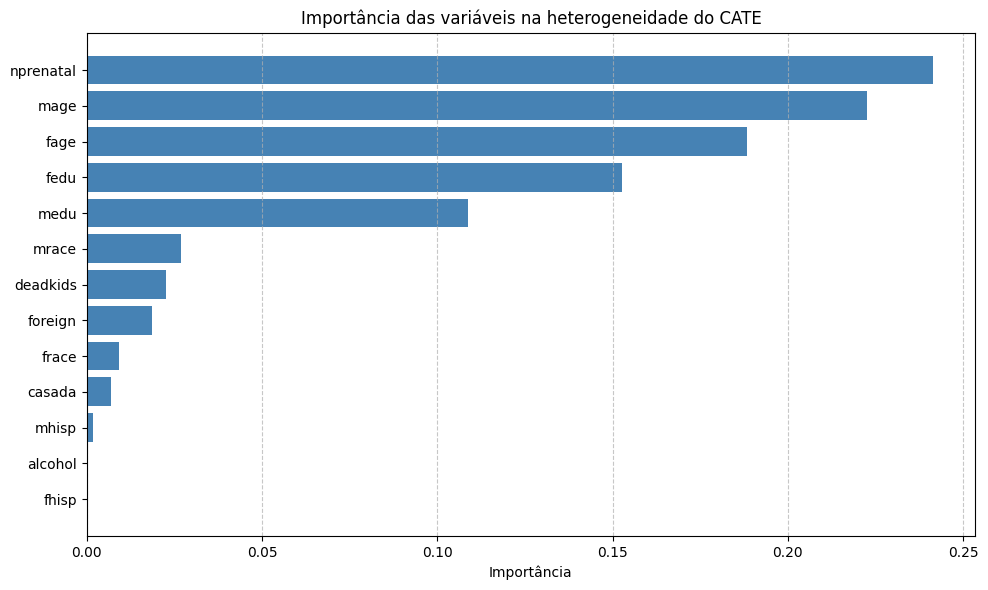

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obter importâncias e nomes das variáveis
importances = cf_dml.feature_importances_
features = np.array(X.columns)

# Ordenar do maior para o menor
sorted_idx = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_idx]
sorted_features = features[sorted_idx]

# Plotar
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='steelblue')
plt.xlabel('Importância')
plt.title('Importância das variáveis na heterogeneidade do CATE')
plt.gca().invert_yaxis()  # Coloca a mais importante no topo
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* o modelo acredita que essa variável sozinha contribui com 1/4 da explicação da heterogeneidade dos efeitos;
* Ela é usada frequentemente nos splits das árvores da floresta causal para distinguir subgrupos com diferentes efeitos do tratamento.

Agora vamos verificar os CATES variando a variável `nprenatal` e mantendo as demais variáveis fixas.

In [59]:
# 1. Perfil médio com nprenatal = 11, por exemplo
X_new = pd.DataFrame({
    'casada': [0.7],
    'mage': [26.5],
    'medu': [12.7],
    'fhisp': [0.04],
    'mhisp': [0.03],
    'foreign': [0.05],
    'alcohol': [0.03],
    'deadkids': [0.26],
    'nprenatal': [11],
    'mrace': [0.84],
    'frace': [0.81],
    'fage': [27.27],
    'fedu': [12.31]
})

# 2. Transformar da mesma forma que o X original
X_new = pd.get_dummies(X_new, drop_first=True)

# 3. Garantir que todas as colunas estão presentes e na mesma ordem
for col in X.columns:
    if col not in X_new.columns:
        X_new[col] = 0
X_new = X_new[X.columns]  # reordenar

# 4. Obter inferência
cate_inf = cf_dml.effect_inference(X_new)
print(cate_inf.summary_frame())



   point_estimate  stderr  zstat  pvalue  ci_lower  ci_upper
X                                                           
0        -229.543  52.645  -4.36     0.0  -332.724  -126.361


Para um perfil médio de mãe, com nprenatal = 11, o tabagismo materno reduz em média o peso do bebê ao nascer em ~229 gramas, com efeito estatisticamente significativo ao nível de 1%.

Esse valor está muito próximo do estimado por outros métodos que você usou (LinearDML), isso é um bom sinal de consistência entre os métodos.

In [60]:
# Valores de nprenatal a testar
nprenatal_vals = [0, 9, 11, 13, 40]

# Perfil médio base fixo
X_base = {
    'casada': [0.7],
    'mage': [26.5],
    'medu': [12.7],
    'fhisp': [0.04],
    'mhisp': [0.03],
    'foreign': [0.05],
    'alcohol': [0.03],
    'deadkids': [0.26],
    'nprenatal': [None],  # será preenchido no loop
    'mrace': [0.84],
    'frace': [0.81],
    'fage': [27.27],
    'fedu': [12.31]
}

# Lista para armazenar resultados
resultados = []

for val in nprenatal_vals:
    X_base['nprenatal'] = [val]
    X_new = pd.DataFrame(X_base)
    X_new = pd.get_dummies(X_new, drop_first=True)

    # Garantir as mesmas colunas e ordem que X original
    for col in X.columns:
        if col not in X_new.columns:
            X_new[col] = 0
    X_new = X_new[X.columns]

    # Estimar CATE e inferência
    inf = cf_dml.effect_inference(X_new).summary_frame().iloc[0]
    
    resultados.append({
        'nprenatal': val,
        'CATE': inf['point_estimate'],
        'Erro_Padrao': inf['stderr'],
        'p_valor': inf['pvalue'],
        'IC_inferior': inf['ci_lower'],
        'IC_superior': inf['ci_upper']
    })

# Montar DataFrame com os resultados
df_cate_cf = pd.DataFrame(resultados)

# Exibir tabela
print(df_cate_cf)


   nprenatal     CATE  Erro_Padrao  p_valor  IC_inferior  IC_superior
0          0 -247.894       95.279    0.009     -434.638      -61.150
1          9 -184.494       47.399    0.000     -277.393      -91.594
2         11 -229.543       52.645    0.000     -332.724     -126.361
3         13 -254.629       48.647    0.000     -349.976     -159.282
4         40 -286.913       77.455    0.000     -438.723     -135.104


Todos os efeitos são negativos, estatisticamente significativos (p < 0.01):
* O tabagismo reduz significativamente o peso ao nascer, independentemente do número de pré-natais.
* Quanto maior o número de consultas pré-natal (nprenatal), maior a magnitude (negativa) do CATE:
  * De –184g em 9 consultas para –287g em 40 consultas.
* Isso pode refletir maior exposição documentada ou maior aderência ao pré-natal por mães que fumam.
* Em nprenatal = 0, o efeito ainda é negativo e significativo (–248g), mas o intervalo de confiança é mais amplo, sugerindo maior incerteza

Pode indicar que o efeito deletério do tabagismo está presente independentemente do pré-natal, mas que:
* Em mães com mais consultas, pode haver melhor identificação do efeito (menos viés de medição);
* Ou seleção negativa: mães fumantes que fazem muitos pré-natais podem ter características piores não observadas (e.g. risco gestacional elevado).

**Como podemos avaliar o desempenho do modelo CATE?**

Cada uma das classes DML tem um atributo score_ depois de serem ajustadas. Então, é possível acessar esse atributo e comparar o desempenho em diferentes parâmetros de modelagem (quanto menor a pontuação, melhor):

## Considerações Finais

Vejamos um resumo do que foi visto.

* O principal objetivo do DML é ajustar e remover a variável de confusão de forma que a variável de interesse (tratamento) e o resultado fiquem "ortogonais" ou "independentes".
* DML combina métodos de aprendizado de máquina com técnicas econométricas para estimar efeitos causais.
* A técnica geralmente envolve a aplicação de aprendizado de máquina para prever tanto o tratamento quanto o resultado usando as variáveis observáveis de confusão, e então os resíduos dessas previsões são utilizados em um segundo estágio para estimar o efeito causal.
  * Primeiro Estágio: Aplicar modelos de aprendizado de máquina para prever a variável de tratamento e o resultado.
  * Segundo Estágio: Utilizar os resíduos dessas previsões em um modelo de regressão para estimar o efeito causal.


In [ ]:
from econml.orf import OrthogonalRandomForest
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

# Modelos auxiliares para outcome e tratamento
model_y = GradientBoostingRegressor(n_estimators=100, random_state=123)
model_t = GradientBoostingClassifier(n_estimators=100, random_state=123)

# Estimador Orthogonal Random Forest
orf = OrthogonalRandomForest(
    n_trees=500,            # Número de árvores na floresta
    min_leaf_size=5,        # Número mínimo de observações por folha
    max_depth=10,           # Profundidade máxima da árvore
    subsample_ratio=0.7,    # Proporção de amostra usada em cada árvore
    model_Y=model_y,        # Modelo para prever o outcome
    model_T=model_t,        # Modelo para prever o tratamento
    discrete_treatment=True, # Tratamento binário
    random_state=123
)

# Ajuste (fit)
orf.fit(Y, T, X=X, W=None)

# Predição do CATE (theta(x))
cate_pred = orf.effect(X)

# Estimação do ATE
ate_pred = cate_pred.mean()

print(f"Estimativa do ATE via ORF: {ate_pred}")
